Preprocessing Dataset Menggunakan Model K-Means Clustering


Import Library

In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [81]:
file_path = "DATASET Jumlah Sekolah.xlsx"  
df = pd.read_excel(file_path)

Pembersihan Data

In [82]:
# Hapus baris tidak relevan
df = df[~df['Provinsi'].isin(['Indonesia', 'TOTAL'])].copy()

# Hapus duplikat
df = df.drop_duplicates()

# Pilih hanya kolom jumlah sekolah
fitur = ['SMA', 'SMK', 'MA', 'SMP', 'MTS', 'SD', 'MI', 'TK', 'RA']
df = df[['Provinsi'] + fitur]

# Isi data hilang dengan nol
df[fitur] = df[fitur].fillna(0)

# Trimming outlier (1% dan 99%)
for col in fitur:
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=q_low, upper=q_high)

# 5. Tambahkan Total Sekolah
df['Total_Sekolah'] = df[fitur].sum(axis=1)

Transformasi Data

In [83]:
# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[fitur])


# PCA (2 dimensi)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

Penerapan Model K-Means Clustering

In [84]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

Visualisasi Hasil Clustering

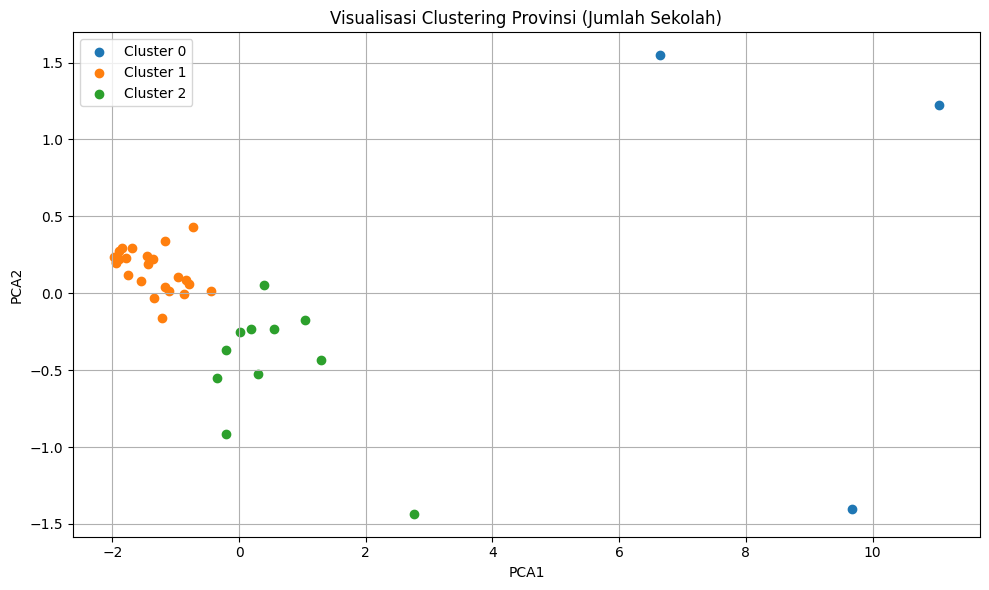

In [85]:
plt.figure(figsize=(10, 6))
for i in range(3):
    cluster = df[df['Cluster'] == i]
    plt.scatter(cluster['PCA1'], cluster['PCA2'], label=f'Cluster {i}')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Visualisasi Clustering Provinsi (Jumlah Sekolah)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Visualisasi Jumlah Sekolah Berdasarkan Provinsi

C:\Users\USER\AppData\Local\Temp\ipykernel_18400\3300946861.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sekolah', y='Provinsi', data=df_provinsi, palette='coolwarm')


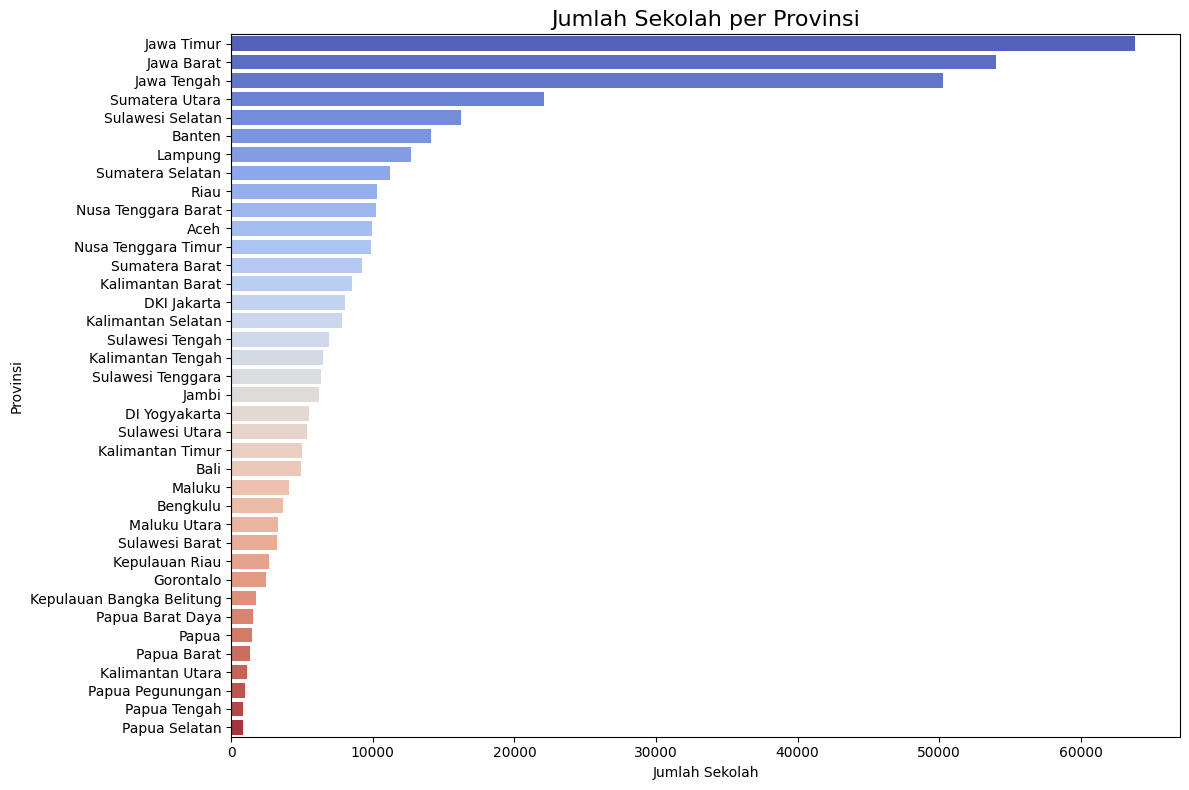

In [86]:
# Pastikan nama kolom sesuai dengan yang ada di DataFrame
df_provinsi = df[['Provinsi', 'Total_Sekolah', 'Cluster']].sort_values(by='Total_Sekolah', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Sekolah', y='Provinsi', data=df_provinsi, palette='coolwarm')
plt.title('Jumlah Sekolah per Provinsi', fontsize=16)
plt.xlabel('Jumlah Sekolah')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()
